# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Loading required libraries initially

In [43]:
## import required libraries initially
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

## Loading the data

In [44]:
#bike_data =pd.read_csv("day.csv", sep=',', dtype='unicode')
bike_data =pd.read_csv("day.csv")

In [45]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [46]:
bike_data.shape

(730, 16)

### Checking for null values and data types

In [47]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Data dictionary:

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	


### Based on the data dictionary

- Categorical variables are: season, yr, mnth, holiday, weekday, workingday, weathersit
- let us convert them from int64 into string Dtype so that it is easy to identify and easy to know statistical details/summary which will help us infer the impact of these categorical variable on target variable "cnt" very easily.


In [48]:
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['yr'] = bike_data['yr'].map({0:'2018', 1:'2019'})
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike_data['holiday'] = bike_data['holiday'].map({0:'non-holiday', 1:'holiday'})
bike_data['weekday'] = bike_data['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
bike_data['workingday'] = bike_data['workingday'].map({0:'non-workingday', 1:'workingday'})
bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

In [49]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [50]:
bike_data.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [51]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,non-holiday,Sunday,non-workingday,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,non-holiday,Monday,non-workingday,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,non-holiday,Tuesday,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,non-holiday,Wednesday,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,non-holiday,Thursday,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Cleaning data

- **Removing instant** feature as this is just sequence number which will not help in model
- Also **removing atemp** which is redundant (i.e. when temp less, and hum and/or windspeed is more, atemp will be more)
- As  we will not be having details while predicting if user will be casual or registered, so we will are **removing these casual and registered** columns also 
- **dteday is also removed** as year, month and weekday, holiday datails are already available in other columns

In [52]:
bike_data=bike_data.drop('instant', axis=1)
bike_data=bike_data.drop('atemp', axis=1)
bike_data=bike_data.drop('casual', axis=1)
bike_data=bike_data.drop('registered', axis=1)
bike_data=bike_data.drop('dteday', axis=1)

In [53]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,non-holiday,Sunday,non-workingday,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,non-holiday,Monday,non-workingday,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,non-holiday,Tuesday,workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,non-holiday,Wednesday,workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,non-holiday,Thursday,workingday,Clear,9.305237,43.6957,12.522300,1600


### We have cleaned the data. Now we will try and understand the data with some charts/graphs

In [54]:
bike_data.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


### Understanding data using categorical variables (mainly to check correlation between target continuous Cnt variable and categorical variable)
 - season
 - yr
 - mnth
 - holiday
 - weekday
 - workingday
 - weathersit	

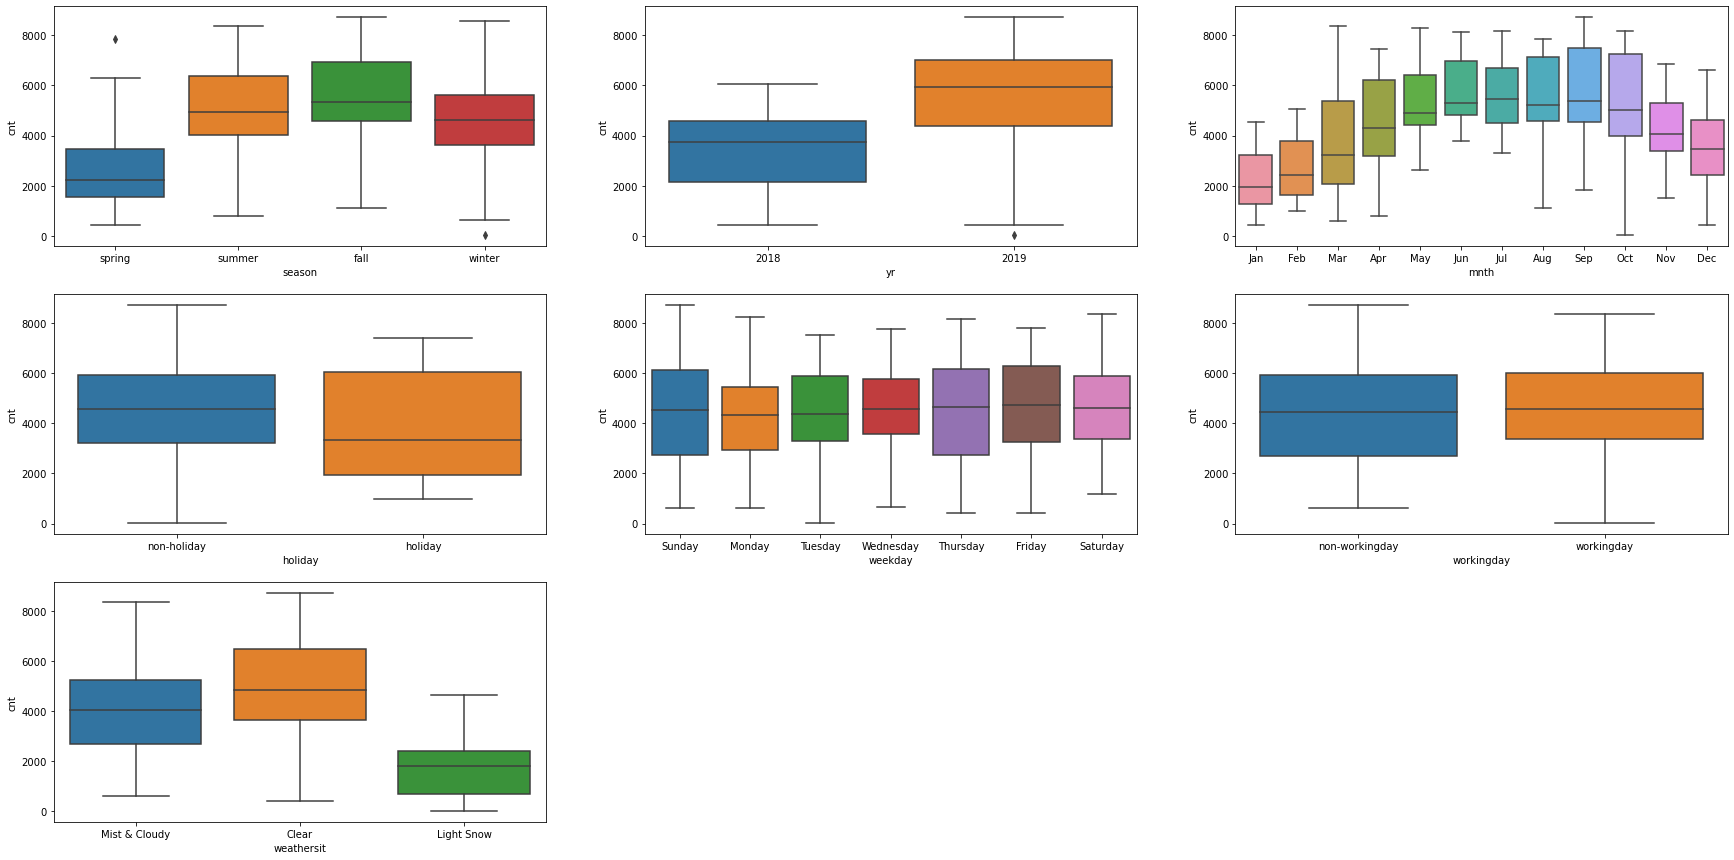

In [55]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

## We can see the cnt is correlated with categorical variables
## There is specific patterns like
- Cnt (demand) is high in summer, fall and winter as compare to spring
- Demand is increasing year by year. (Cnt in 2019 is greater than 2018)
- Demand is high in mid of year ( Cnt is higher between May and Oct)
- Demand is high during non-holiday
- Demand is high in Clear weather and Mist & Cloudy than demand in Ligh Snow
- Demand is samilar on all day


 ### Lets check, if cnt is linearly related with any numeric variable or not
    - Is there any linear relationship or not?
    - By visualising see if there is any multicolliniarity or not?
    

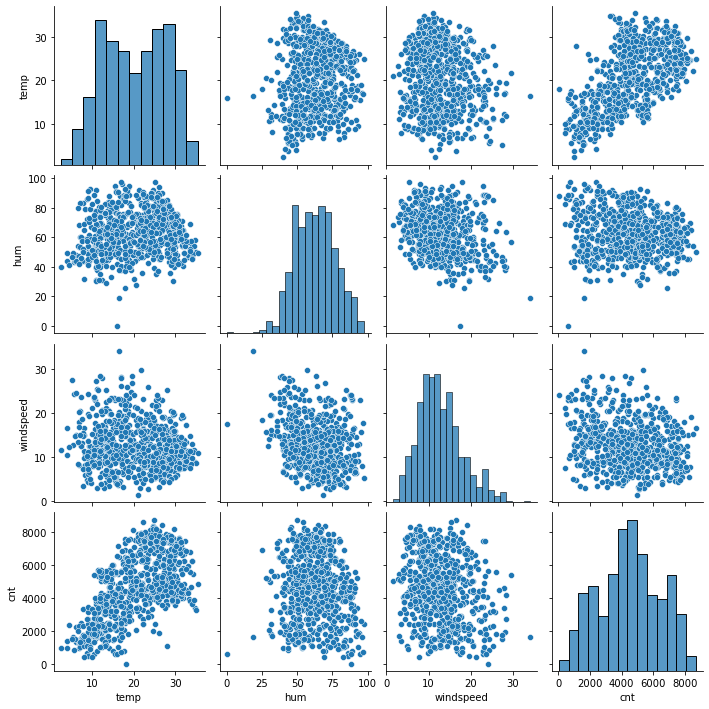

In [56]:
#visualing numeric variables
sns.pairplot(bike_data)

### We can see above that cnt and temp has positive correlation, cnt is explained by variance in temp
### Also there is correlation with Cnt and hum

## Data Preparation
    - Encoding:
       - Dummy encoding for Categorical variables
           - Converting binary variables to 1/0
           - Other categorical variables to dummy variables
     - Splitting into train and test
     - Rescaling of variables important as we are working on multiple regressions
     


## Lets start Encoding

In [57]:
#yes/no - variables map to 0 and 1

bike_data['holiday']= bike_data['holiday'].map({'non-holiday':0, 'holiday':1})
bike_data['workingday']= bike_data['workingday'].map({'non-workingday':0, 'workingday':1})

#bike_data.holiday.value_counts()
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600


## Creating dummy variables for categorical variables
 - season
 - yr
 - mnth
 - holiday
 - weekday
 - workingday
 - weathersit

### Creating dummy variable for season

In [58]:
##Creating dummy variable for season
season = pd.get_dummies(bike_data['season'])
season

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


We do not need all 4 columns/varibles as we can repesent same information by 3 variables, so we will delete one variable/column

So we can **drop fall** column
- 000 will correspond to fall
- 100 will correspond to spring
- 010 will correspond to summer
- 001 will correspond to winter


So k-1 dummy variables, where K is level for categorical variable

In [59]:
## dropping redundant dummy variable
season = pd.get_dummies(bike_data['season'],drop_first=True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [60]:
#lets us join it into original data frame
#cancat with original one
bike_data_new = pd.concat([bike_data,season],axis=1) # horizontally
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,2018,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,2018,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,2018,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,2018,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,2018,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [61]:
#now let us drop,the season categorical variable
bike_data_new = bike_data_new.drop('season',axis=1) # column, but not row
bike_data_new.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,2018,Jan,0,Sunday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,2018,Jan,0,Monday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,2018,Jan,0,Tuesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,2018,Jan,0,Wednesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,2018,Jan,0,Thursday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


### Similary lets create dummy varibles for other categorical variables: yr, mnth, weekday, weathersit

In [62]:
yr = pd.get_dummies(bike_data_new['yr'],drop_first=True)
bike_data_new = pd.concat([bike_data_new,yr],axis=1) # horizontally
bike_data_new = bike_data_new.drop('yr',axis=1) # column, but not row

mnth = pd.get_dummies(bike_data_new['mnth'],drop_first=True)
bike_data_new = pd.concat([bike_data_new,mnth],axis=1) # horizontally
bike_data_new = bike_data_new.drop('mnth',axis=1) # column, but not row

weekday = pd.get_dummies(bike_data_new['weekday'],drop_first=True)
bike_data_new = pd.concat([bike_data_new,weekday],axis=1) # horizontally
bike_data_new = bike_data_new.drop('weekday',axis=1) # column, but not row

weathersit = pd.get_dummies(bike_data_new['weathersit'],drop_first=True)
bike_data_new = pd.concat([bike_data_new,weathersit],axis=1) # horizontally
bike_data_new = bike_data_new.drop('weathersit',axis=1) # column, but not row

bike_data_new.head()


,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   holiday        730 non-null    int64  
 1   workingday     730 non-null    int64  
 2   temp           730 non-null    float64
 3   hum            730 non-null    float64
 4   windspeed      730 non-null    float64
 5   cnt            730 non-null    int64  
 6   spring         730 non-null    uint8  
 7   summer         730 non-null    uint8  
 8   winter         730 non-null    uint8  
 9   2019           730 non-null    uint8  
 10  Aug            730 non-null    uint8  
 11  Dec            730 non-null    uint8  
 12  Feb            730 non-null    uint8  
 13  Jan            730 non-null    uint8  
 14  Jul            730 non-null    uint8  
 15  Jun            730 non-null    uint8  
 16  Mar            730 non-null    uint8  
 17  May            730 non-null    uint8  
 18  Nov       

### Before model building, we first need to perform the test-train split and scale the features, to ensure everything is on same scale for model

In [64]:
#import sklearn
#from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike_data_new, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Rescaling - Important in case of multiple regression
If variables are at very differnt scale, interpretting coeffient is very difficult (coeefieicnet of lower value column will be larger than coefficient of column with larger value, also we cannot say field having larger coefficent is strong predictor.)
So any model, coefficients to be intepreted, all variable must be at comparable scale. so that coefficients are coomparable)

Mathematical reason if scaled between 0 and 1, the optimization begind the scene is faster, gradient descent function tries to minimize the cost function, so minimization routine becomes much more fast.

1. Min-Max scaling (normalisation): Between 0 and 1
2. Standardisation (mean - 0, sigma - 1) 

Additional info:
- normalisation: (x-x_min)/(x_max - x_min) - data is compressed between -0 and 1
- standardisation: (x-mu)/Sigma ; mu - mean; sigma - std dev --> mean will be zero and std dev will be 1


 - fit() ->  learn (xmax and xmin values)
 - transform() -> computes the formula (x-x_min)/(x_max - x_min) 
 - fit_transform()   called fit and transform

#### 1. Min-Max Scaling

In [65]:
#1. Min-Max Scaling
#from sklearn.preprocessing import MinMaxScaler

#1. instantiate the object
scaler = MinMaxScaler() 

# want to scale only numeric variable, do not want to scale binary variables (yes/no variables)
#list of only numeric variables

num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## Train the Model

### lets start building a multiple linear regression model.

As this is multiple regression, we have multiple variables.
Should all variables shoud be part of the model or limited?
if limited then which variables to be used and what should be the basis for using variable for building varibles.
Two ways we have
1. You start of all variables, keep on removing the variable that are insignificant.
2. Start with one variable and add one more variable and check if model improves. usually it improves when you add more varibles.


### Start with second way. Add one variable and keep on adding more variables


Let’s prepare a heat map and take a look at the correlations between the variables.

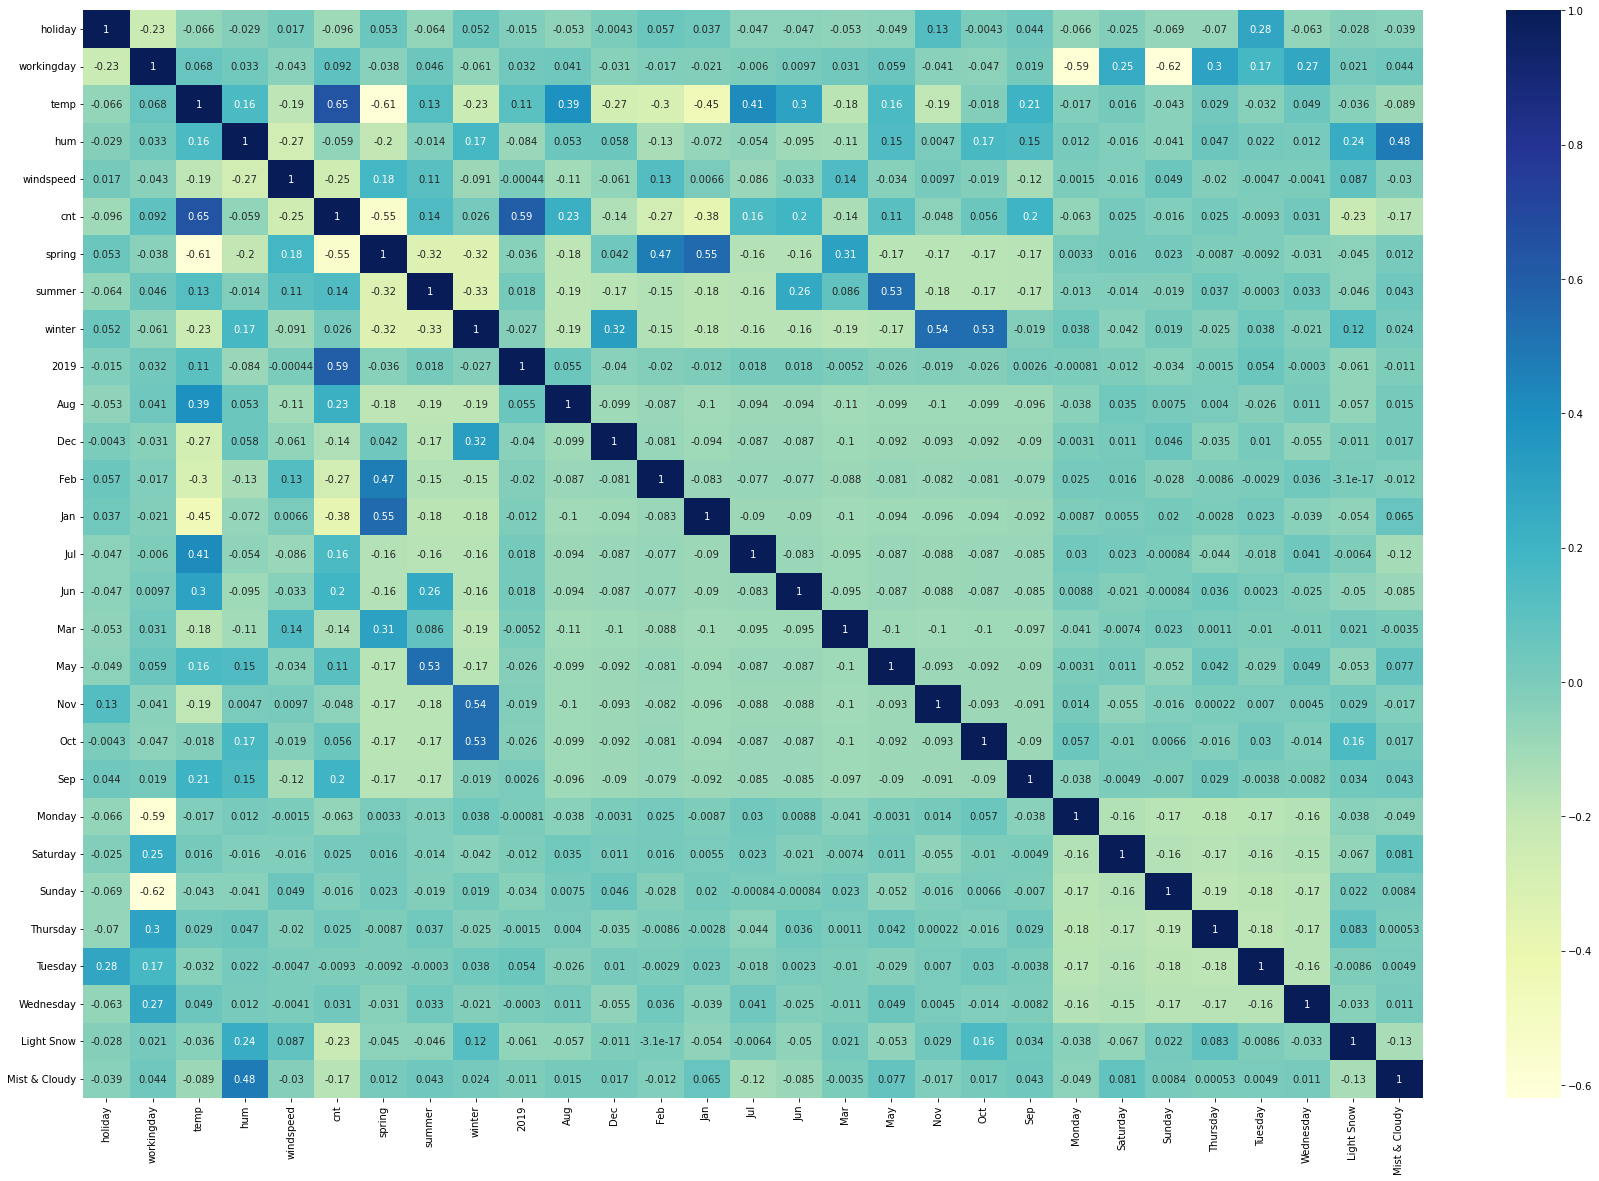

In [66]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [67]:
#y_train - it should have only cnt
#x_train - all columns without cnt

y_train=df_train.pop('cnt')
x_train=df_train

#### Building the model 
Steps:
1. Adding variables one at a time, 
2. Check statistival significance of varibles, 
3. Check the the variables correlation with other variables/ VIF

In [68]:
# Add libraries
# 1st by using stats with stats model to check p value/significance level
#import statsmodels.api as sm

#Add a constant (as required by stats model)
x_train_sm = sm.add_constant(x_train['temp']) # creating first model where we are using temp as predictor variable. 
#Used temp as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [69]:
#we can see coeffient of temp is +ve. so if temp is there then cnt increases
#let us also check the significant of temp variable
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.46e-61
Time:                        05:38:51   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### p value for holiday is  significant (as it is equal to zero)

#### R-squared = 0.416 means almost 41% of variance in Cnt (Target) is explain by the temp (variable)

In [70]:
# add another variable to improve the model.
# adding next highly correlated variable 2019
#Add a constant (as required by stats model)
x_train_sm = sm.add_constant(x_train[['temp','2019']]) 
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.34e-130
Time:                        05:38:51   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
2019           0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#note:
#coefficient of temp is changed and reduced
#coefficient of 2019 is also +ve, 
#p value is also zero for all variables. Means all these coefficients are statistically significant
#r-square has gone up from 0.416 to 0.692. so now we can say 69% of variance in Cnt is explained by these 2 variables.
#means approaching good model

In [72]:
#Lets add another variable (which is highly correlated.)  //Aug,Jun and Sep columns - 0.2 correlation

x_train_sm = sm.add_constant(x_train[['temp','2019','Aug','Jun','Sep']]) 
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.03e-128
Time:                        05:38:51   Log-Likelihood:                 344.68
No. Observations:                 510   AIC:                            -677.4
Df Residuals:                     504   BIC:                            -652.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0830      0.016      5.261      0.000       0.052       0.114
temp           0.5653      0.030     18.775      0.000       0.506       0.624
2019           0.2377      0.011     21.537      0.000       0.216       0.259
Aug           -0.0090      0.021     -0.418      0.676      -0.051       0.033
Jun            0.0174      0.023      0.764      0.445      -0.027       0.062
Sep            0.0684      0.022      3.179      0.002       0.026       0.111
==============================================================================
Omnibus:                       36.850   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.088
Skew:                          -0.570   Prob(JB):                     1.33e-11
Kurtosis:                       4.028   Cond. No.                         8.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#now note;
#R-squared = 0.699 - no much change
#Aug and Jun has p value = 0.6 and 0.4 - so statistically not significant

#So lets remove these variables Aug and Jun and try again
x_train_sm = sm.add_constant(x_train[['temp','2019','Sep']]) 
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     389.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.37e-131
Time:                        05:38:51   Log-Likelihood:                 344.17
No. Observations:                 510   AIC:                            -680.3
Df Residuals:                     506   BIC:                            -663.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0826      0.015      5.586      0.000       0.054       0.112
temp           0.5672      0.025     22.718      0.000       0.518       0.616
2019           0.2375      0.011     21.542      0.000       0.216       0.259
Sep            0.0676      0.021      3.282      0.001       0.027       0.108
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.255
Skew:                          -0.570   Prob(JB):                     1.22e-11
Kurtosis:                       4.033   Cond. No.                         6.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R squared did not increase almost it is same

#### This is tadeous as we have many variables.

#### So lets add all variables and remove one by one.

### Model 2

#### Adding all variables to the model

In [74]:
#lets look all columns we have
x_train.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Light Snow', 'Mist & Cloudy'],
      dtype='object')

In [75]:
#So lets add all variables
x_train_sm = sm.add_constant(x_train) 
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.00e-181
Time:                        05:38:51   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2395      0.035      6.768      0.000       0.170       0.309
holiday           0.0046      0.024      0.190      0.849      -0.043       0.052
workingday        0.0907      0.012      7.329      0.000       0.066       0.115
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
2019              0.2324      0.008     28.819      0.000       0.217       0.248
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul              -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun               0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Monday            0.0450      0.014      3.253      0.001       0.018       0.072
Saturday          0.0091      0.016      0.588      0.557      -0.021       0.040
Sunday            0.0992      0.014      7.292      0.000       0.072       0.126
Thursday          0.0036      0.015      0.248      0.804      -0.025       0.032
Tuesday          -0.0118      0.015     -0.780      0.436      -0.042       0.018
Wednesday        -0.0088      0.015     -0.571      0.568      -0.039       0.022
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist & Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.86e+15
================================================================

In [76]:
# checking P value
# p value of holiday (0.8), Aug (0.5), Mar (0.9), Jun, Oct, Thursday, (0.8), Sat, Wednesday (0.5):

# Note### for p-value, anything approaching 1 is high. (less than 0.05 is low and anything above 0.05 is high)
# 0.05 is the threashold for p-value

# So approach is check significance (p-value) and DROP these variables (one at a time) to reach a model
# We can also check VIF

# We will look at both (p-value/Significance and VIG together) and then decide if we can remove/drop a variable or not.

In [77]:
# import -> from statsmodels.stats.outliers_influence import variance_inflation_factor
#create a dataframe that will contain all the features variables and their respective VIF
vif= pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,86.40
22,Sunday,19.71
20,Monday,18.34
5,spring,10.75
7,winter,9.44
6,summer,8.27
2,temp,7.08
17,Nov,6.79
18,Oct,6.47
9,Aug,6.36


#### Note we keep variables having VIF less than 5 
#### VIF = 1/(1-R-square) i.e. 1 - R-square = 0.2 i.e. R-square = 0.8 (80%) which is good. that is why we selected VIF = 5

#### Will you remove variables having high p-value or high VIF

We could have :

- High P value and High VIF (Remove straighaway - no brainer) 
  - High-low
    - a. High P , low VIF (Remove these first)
    - b. Low P, high VIF (Remove after the above once are removed) because after rebuilding model after a. value changes
- Low P Low VIF (Keep these varaibales)

In [78]:
# Mar has high p-value but low VIF - so lets remove Mar varible, build the model and check
X = x_train.drop('Mar',axis=1) # 1- column

In [79]:
#create another model without Mar
x_train_sm = sm.add_constant(X)  # <-- X does not have Mar variable
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.87e-182
Time:                        05:38:51   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2401      0.033      7.268      0.000       0.175       0.305
holiday           0.0047      0.024      0.199      0.842      -0.042       0.051
workingday        0.0909      0.012      7.693      0.000       0.068       0.114
temp              0.4450      0.046      9.763      0.000       0.355       0.535
hum              -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed        -0.1861      0.026     -7.245      0.000      -0.237      -0.136
spring           -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer            0.0427      0.026      1.668      0.096      -0.008       0.093
winter            0.1079      0.027      3.934      0.000       0.054       0.162
2019              0.2324      0.008     28.848      0.000       0.217       0.248
Aug               0.0198      0.032      0.627      0.531      -0.042       0.082
Dec              -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb              -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan              -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Jul              -0.0344      0.033     -1.035      0.301      -0.100       0.031
Jun               0.0042      0.023      0.179      0.858      -0.042       0.050
May               0.0243      0.020      1.235      0.218      -0.014       0.063
Nov              -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct               0.0066      0.031      0.215      0.830      -0.054       0.067
Sep               0.0852      0.029      2.945      0.003       0.028       0.142
Monday            0.0451      0.014      3.327      0.001       0.018       0.072
Saturday          0.0091      0.016      0.587      0.558      -0.021       0.040
Sunday            0.0994      0.013      7.516      0.000       0.073       0.125
Thursday          0.0036      0.015      0.246      0.806      -0.025       0.032
Tuesday          -0.0118      0.015     -0.783      0.434      -0.042       0.018
Wednesday        -0.0088      0.015     -0.574      0.566      -0.039       0.021
Light Snow       -0.2558      0.026     -9.709      0.000      -0.308      -0.204
Mist & Cloudy    -0.0596      0.010     -5.716      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                     7.60e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [80]:
vif= pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,74.82
21,Sunday,17.21
19,Monday,16.19
5,spring,9.65
7,winter,9.12
6,summer,7.95
2,temp,6.89
9,Aug,5.64
13,Jul,5.08
16,Nov,4.86


In [81]:
# note VIF changes due to removal of Mar

In [82]:
#Now, Similary remove all variables having p-value very high i.e. approaching 1
# p value of holiday (0.8), Aug (0.5), Jun, Oct, Thursday, (0.8), Sat, Wednesday (0.5):
X = X.drop('holiday',axis=1) # 1- column
X = X.drop('Aug',axis=1) # 1- column
X = X.drop('Jun',axis=1) # 1- column
X = X.drop('Oct',axis=1) # 1- column
X = X.drop('Thursday',axis=1) # 1- column
X = X.drop('Wednesday',axis=1) # 1- column
X = X.drop('Feb',axis=1) # 1- column
X = X.drop('May',axis=1) # 1- column
X = X.drop('Monday',axis=1) # 1- column
X = X.drop('Saturday',axis=1) # 1- column
X = X.drop('Tuesday',axis=1) # 1- column

In [83]:
#create another model without Jun
x_train_sm = sm.add_constant(X)  # <-- X does not have Jun variable
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.20e-190
Time:                        05:38:52   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2690      0.037      7.267      0.000       0.196       0.342
workingday        0.0521      0.011      4.826      0.000       0.031       0.073
temp              0.4744      0.037     12.978      0.000       0.403       0.546
hum              -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed        -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring           -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer            0.0421      0.015      2.783      0.006       0.012       0.072
winter            0.1038      0.018      5.832      0.000       0.069       0.139
2019              0.2311      0.008     28.929      0.000       0.215       0.247
Dec              -0.0398      0.017     -2.302      0.022      -0.074      -0.006
Jan              -0.0465      0.018     -2.596      0.010      -0.082      -0.011
Jul              -0.0514      0.018     -2.854      0.004      -0.087      -0.016
Nov              -0.0441      0.018     -2.390      0.017      -0.080      -0.008
Sep               0.0714      0.017      4.289      0.000       0.039       0.104
Sunday            0.0625      0.014      4.493      0.000       0.035       0.090
Light Snow       -0.2552      0.026     -9.754      0.000      -0.307      -0.204
Mist & Cloudy    -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif= pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,31.08
1,temp,18.94
0,workingday,4.77
3,windspeed,4.77
4,spring,4.50
6,winter,4.11
5,summer,2.88
15,Mist & Cloudy,2.32
7,2019,2.09
13,Sunday,1.86


In [85]:
# Now, all p values are below 0.05 (threshold) so remove variables having high VIF (case low p and high VIF)
# note -one by one removal and check
X = X.drop('hum',axis=1) # 1- column

x_train_sm = sm.add_constant(X) 
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.84e-188
Time:                        05:38:52   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1985      0.033      6.031      0.000       0.134       0.263
workingday        0.0547      0.011      5.009      0.000       0.033       0.076
temp              0.4354      0.036     12.191      0.000       0.365       0.506
windspeed        -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring           -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer            0.0354      0.015      2.320      0.021       0.005       0.065
winter            0.0903      0.018      5.093      0.000       0.055       0.125
2019              0.2348      0.008     29.173      0.000       0.219       0.251
Dec              -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan              -0.0526      0.018     -2.905      0.004      -0.088      -0.017
Jul              -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov              -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep               0.0652      0.017      3.880      0.000       0.032       0.098
Sunday            0.0670      0.014      4.758      0.000       0.039       0.095
Light Snow       -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Mist & Cloudy    -0.0818      0.009     -9.526      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif= pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,6.92
0,workingday,4.74
2,windspeed,4.71
3,spring,3.09
5,winter,3.03
4,summer,2.33
6,2019,2.08
12,Sunday,1.86
10,Nov,1.79
8,Jan,1.67


In [87]:
# now lets remove temp as VIF > 5
X = X.drop('temp',axis=1) # 1- column

x_train_sm = sm.add_constant(X) 
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.73e-161
Time:                        05:38:53   Log-Likelihood:                 446.27
No. Observations:                 510   AIC:                            -862.5
Df Residuals:                     495   BIC:                            -799.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5452      0.019     28.928      0.000       0.508       0.582
workingday        0.0562      0.012      4.516      0.000       0.032       0.081
windspeed        -0.1920      0.028     -6.807      0.000      -0.247      -0.137
spring           -0.2487      0.017    -14.223      0.000      -0.283      -0.214
summer           -0.0485      0.016     -3.127      0.002      -0.079      -0.018
winter           -0.0186      0.017     -1.069      0.286      -0.053       0.016
2019              0.2459      0.009     26.987      0.000       0.228       0.264
Dec              -0.1119      0.019     -5.907      0.000      -0.149      -0.075
Jan              -0.1221      0.020     -6.237      0.000      -0.161      -0.084
Jul              -0.0149      0.021     -0.725      0.469      -0.055       0.025
Nov              -0.1037      0.021     -5.033      0.000      -0.144      -0.063
Sep               0.0503      0.019      2.633      0.009       0.013       0.088
Sunday            0.0660      0.016      4.113      0.000       0.034       0.097
Light Snow       -0.3171      0.028    -11.482      0.000      -0.371      -0.263
Mist & Cloudy    -0.0887      0.010     -9.093      0.000      -0.108      -0.070
==============================================================================
Omnibus:                       67.046   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.024
Skew:                          -0.666   Prob(JB):                     4.42e-38
Kurtosis:                       5.515   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif= pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.26
0,workingday,3.56
2,spring,3.03
4,winter,3.01
3,summer,2.27
5,2019,1.91
9,Nov,1.78
7,Jan,1.64
11,Sunday,1.63
13,Mist & Cloudy,1.57


In [89]:
# now we see, p value increased for some variables (>0.05) -  Jul (0.469)

X = X.drop('Jul',axis=1) # 1- column

x_train_sm = sm.add_constant(X) 
#Used 2 variables, temp and 2019 as this is highly correlated

#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.80e-162
Time:                        05:38:53   Log-Likelihood:                 446.00
No. Observations:                 510   AIC:                            -864.0
Df Residuals:                     496   BIC:                            -804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5395      0.017     31.606      0.000       0.506       0.573
workingday        0.0565      0.012      4.544      0.000       0.032       0.081
windspeed        -0.1919      0.028     -6.806      0.000      -0.247      -0.136
spring           -0.2435      0.016    -15.318      0.000      -0.275      -0.212
summer           -0.0432      0.014     -3.159      0.002      -0.070      -0.016
winter           -0.0139      0.016     -0.861      0.390      -0.046       0.018
2019              0.2460      0.009     27.007      0.000       0.228       0.264
Dec              -0.1115      0.019     -5.889      0.000      -0.149      -0.074
Jan              -0.1221      0.020     -6.239      0.000      -0.161      -0.084
Nov              -0.1030      0.021     -5.007      0.000      -0.143      -0.063
Sep               0.0546      0.018      3.005      0.003       0.019       0.090
Sunday            0.0661      0.016      4.123      0.000       0.035       0.098
Light Snow       -0.3172      0.028    -11.492      0.000      -0.371      -0.263
Mist & Cloudy    -0.0882      0.010     -9.069      0.000      -0.107      -0.069
==============================================================================
Omnibus:                       67.168   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.757
Skew:                          -0.670   Prob(JB):                     8.33e-38
Kurtosis:                       5.498   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif= pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.08
0,workingday,3.31
4,winter,2.84
2,spring,2.77
3,summer,2.00
5,2019,1.88
8,Nov,1.78
7,Jan,1.64
10,Sunday,1.57
12,Mist & Cloudy,1.57


In [91]:
X = X.drop('winter',axis=1) # 1- column

x_train_sm = sm.add_constant(X) 


#create first model
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.00e-163
Time:                        05:38:54   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5348      0.016     33.009      0.000       0.503       0.567
workingday        0.0571      0.012      4.600      0.000       0.033       0.081
windspeed        -0.1926      0.028     -6.836      0.000      -0.248      -0.137
spring           -0.2376      0.014    -16.537      0.000      -0.266      -0.209
summer           -0.0385      0.013     -3.070      0.002      -0.063      -0.014
2019              0.2461      0.009     27.027      0.000       0.228       0.264
Dec              -0.1183      0.017     -6.880      0.000      -0.152      -0.085
Jan              -0.1232      0.020     -6.315      0.000      -0.162      -0.085
Nov              -0.1122      0.018     -6.376      0.000      -0.147      -0.078
Sep               0.0563      0.018      3.116      0.002       0.021       0.092
Sunday            0.0664      0.016      4.146      0.000       0.035       0.098
Light Snow       -0.3202      0.027    -11.699      0.000      -0.374      -0.266
Mist & Cloudy    -0.0890      0.010     -9.183      0.000      -0.108      -0.070
==============================================================================
Omnibus:                       70.521   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.014
Skew:                          -0.692   Prob(JB):                     6.68e-41
Kurtosis:                       5.606   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif= pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.92
0,workingday,3.21
2,spring,2.38
4,2019,1.87
3,summer,1.79
6,Jan,1.63
9,Sunday,1.54
11,Mist & Cloudy,1.54
7,Nov,1.22
8,Sep,1.20


#### Now all p-values are below 0.05 threshold and VIF are below 5

### Residual Analysis of the train data and prediction

#### Residual Analysis

In [93]:
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

576    0.787034
426    0.471571
728    0.297298
482    0.683529
111    0.391055
         ...   
578    0.801971
53     0.332879
350    0.310837
79     0.362374
520    0.641246
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

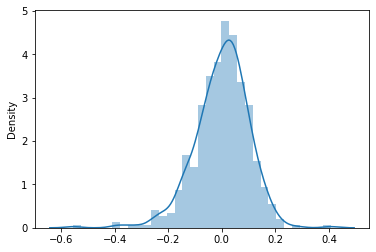

In [94]:
# plot histogram (distribution of error terms)
res = y_train - y_train_pred
sns.distplot(res)

In [95]:
#it is centered around zero and normal (as expected which should be the case)

In [96]:
#now lets do making predictions on the test set and evaluating the model on the test set

### Step 4 - Predictions and Evaluation on the Test Set

In [97]:
# note above on the train set, R-squared is 0.797
# now lets check the R-squared on test set

In [98]:
# we have test set
# important to note 
# 1st step :is to make transformation on test set as we did on train set (scaling) which will be comparable
  # we have test set, need to scale using scaler as in preprocessing section (normalisation)
  # test set should be in same scale (as it will not throw error but prediction will be completly wrong)

#2nd Step:
  #Generally
    #fit() - Never fit on test set / fit_transform, Test should never be used to make model learn anthing, test data should be unseen data
    #transform() - test data set
    #fit_tramsform()





In [99]:
#Scaling on test data Set

num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars]) # <- note - no fit here
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
184,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,...,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.027273,0.318182
std,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,...,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
# we can note, scaling is done

In [102]:
# now make predictions

y_test = df_test.pop('cnt')
x_test = df_test

In [103]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,holiday,workingday,temp,hum,windspeed,spring,summer,winter,2019,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
184,1.0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,0,1,0.901354,0.610133,0.153728,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# drop variables where we do not have coefficients

In [105]:
#X_test_sm = X_test_sm.drop(['',''],axis=1)
#or consider column which are in train set

x_test_sm = x_test_sm[x_train_sm.columns]
x_test_sm.head()

,const,workingday,windspeed,spring,summer,2019,Dec,Jan,Nov,Sep,Sunday,Light Snow,Mist & Cloudy
184,1.0,0,0.084219,0,0,0,0,0,0,0,0,0,1
535,1.0,1,0.153728,0,1,1,0,0,0,0,0,0,0
299,1.0,1,0.334206,0,0,0,0,0,0,0,0,0,1
221,1.0,1,0.339570,0,0,0,0,0,0,0,0,0,0
152,1.0,1,0.537414,0,1,0,0,0,0,0,0,0,0


In [106]:
# make prediction
y_test_pred = lr_model.predict(x_test_sm)


In [107]:
#evaluate the model (to compute R-squared)
#from sklearn.metrics import r2_score
r2_score(y_true=y_test , y_pred=y_test_pred)


0.7852321368887248

In [108]:
#R-squared on test set is 0.78 which is close to train set R-squared. 
#So we can say what model has learned on train set, it also very well ca generalise on test set

### Steps we will follow in this are
1. reading, understanding and visualing the data
2. preparing the data for modelling (train-test split, rescalting etc)
3. Training the Model
4. Residual Analysis
5. Prediction and Evaluation on the test set

In [109]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.00e-163
Time:                        05:38:58   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5348      0.016     33.009      0.000       0.503       0.567
workingday        0.0571      0.012      4.600      0.000       0.033       0.081
windspeed        -0.1926      0.028     -6.836      0.000      -0.248      -0.137
spring           -0.2376      0.014    -16.537      0.000      -0.266      -0.209
summer           -0.0385      0.013     -3.070      0.002      -0.063      -0.014
2019              0.2461      0.009     27.027      0.000       0.228       0.264
Dec              -0.1183      0.017     -6.880      0.000      -0.152      -0.085
Jan              -0.1232      0.020     -6.315      0.000      -0.162      -0.085
Nov              -0.1122      0.018     -6.376      0.000      -0.147      -0.078
Sep               0.0563      0.018      3.116      0.002       0.021       0.092
Sunday            0.0664      0.016      4.146      0.000       0.035       0.098
Light Snow       -0.3202      0.027    -11.699      0.000      -0.374      -0.266
Mist & Cloudy    -0.0890      0.010     -9.183      0.000      -0.108      -0.070
==============================================================================
Omnibus:                       70.521   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.014
Skew:                          -0.692   Prob(JB):                     6.68e-41
Kurtosis:                       5.606   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Model is:
    
   0.5348 + 0.0571 x *workingday* - 0.1926 x *windspeed* - 0.2376 x *spring* + 0.2461 x *2019* - 0.1183 x *Dec* - 0.1232 x *Jan* - 0.1122 x *Nov* + 0.0563 x *Sep* + 0.0664 x *Sunday* - 0.3202  x *Light Snow* - 0.0890 x *Mist & Cloudy*

### Variable Selection using RFE

In [110]:
#Helps in automated variable selection

#after train  test split, scaling, divide into x_train and y_train

#RFE - recursive feature elimination


In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [112]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [113]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 17),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 15),
 ('Sunday', False, 4),
 ('Thursday', False, 18),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', False, 3)]

In [114]:
col = x_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', '2019',
       'Jul', 'Sep', 'Light Snow'],
      dtype='object')

In [115]:
x_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist & Cloudy'],
      dtype='object')

#### Like done before using manual field selection
#### Building model using statsmodel, for the detailed statistics

In [116]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [117]:
# Adding a constant variable 
x_train_rfe = sm.add_constant(x_train_rfe)

In [118]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [119]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.79e-186
Time:                        05:39:01   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2682      0.026     10.292      0.000       0.217       0.319
holiday       -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp           0.6200      0.023     27.492      0.000       0.576       0.664
hum           -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed     -0.2059      0.026     -7.889      0.000      -0.257      -0.155
summer         0.0800      0.011      7.281      0.000       0.058       0.102
winter         0.1390      0.011     12.903      0.000       0.118       0.160
2019           0.2259      0.008     27.118      0.000       0.210       0.242
Jul           -0.0482      0.018     -2.606      0.009      -0.085      -0.012
Sep            0.0944      0.016      5.724      0.000       0.062       0.127
Light Snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note: R-squared is 0.832 (83%)

#### None of the variables have p-value approaching to 1 so all 10 variables are significant. 

#### Now lets try with 15 variables

In [120]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [121]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 10),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 7),
 ('Wednesday', False, 9),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', True, 1)]

In [122]:
col = x_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', '2019', 'Jan', 'Jul', 'Sep', 'Sunday', 'Light Snow',
       'Mist & Cloudy'],
      dtype='object')

In [123]:
x_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [124]:
x_train_rfe = x_train[col]

In [125]:
# Adding a constant variable 
x_train_rfe = sm.add_constant(x_train_rfe)

In [126]:
lm = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [127]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.22e-191
Time:                        05:39:03   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
2019              0.2305      0.008     28.795      0.000       0.215       0.246
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sunday            0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist & Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### while using 15 variables also, we find all 15 variables have p-value indicating significant (not greater than 0.05 threashold)
#### if we had non-significant variable we would have followed the same approach of checking p-value & VIF together, before removing it